<a href="https://colab.research.google.com/github/coder-amey/Finding_e/blob/main/Finding_e.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# *Finding $e$ in the Mysterious Realm of MATHEMATICS...*

In this runnable-article, or – in other words, a computer-supported thought-experiment, I wish to dwell upon certain aspects of Mathematics which I feel are rather underappreciated in high school and college.  

### The Premise:
In this experiment, we shall assume that the following are **concepts known to us**:
* Basic operations \(+, -, \*, /, ^\) \[Note: the power operator \('^'\) makes sense only with integral powers or known roots\]
* Basic Algebra and Polynomials
* Basic Geometry (Lines, Curves, Tangents and Slopes)
* Basic Functions and Plotting
* Fundamental Trigonometry
* Fundamentals of Limits
* Derivative by First Principle
* Chain rule of differentiation
* Fundamentals of Complex numbers

The following are **concepts unknown to us** and we shall stumble upon them in due course:
* Fractional Powers
* Logarithms
* $e$
* Infinite Series Approximation
* Euler's Identity

### Let's Begin!

We shall rely on minimum external dependencies to keep our experiment as simple as possible.  
Let us set up our working environment by **importing the libraries for plotting and smoothing graphs**.  

We also require the **library for math** so as to use the **trigonometric functions** as well as the **constant $\pi$**.  

In [1]:
import math
import matplotlib.pyplot as graph
from scipy.interpolate import make_interp_spline, BSpline

We shall begin with the simple squaring function: $f(x) = x ^ 2$.  
Let us plot a simple parabolic curve using this function.  

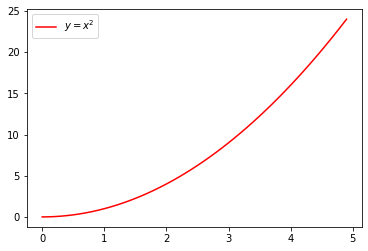

In [2]:
f = lambda x: x * x
#f is our function template. Here we assign it with a lambda function to obtain squares.

#Plot the chart
X = [x / 10 for x in range(50)]   #X = [0.0, 0.1, 0.2, ..., 4.8, 4.9]
Y = [f(x) for x in X]
graph.plot(X, Y, 'red', label = "$y = x ^ 2$")
graph.legend()
print()   #Clears the extra graph info.

###Derivative by First Principle

According to the First Principle, the derivative of a function $f$ at a point $x$ is the function:  
$f'(x) = \lim\limits_{h\to 0} \frac{f(x + h) - f(x)}{h}$.  

Essentially, we are measuring the slope of a line passing through two nearly coinciding points on the curve of the given function, separated by an infinitesimally small distance ($h$). As $h$ approaches $0$, we obtain the slope of the tangent to the function $f$ at $x$.  

Let us apply this principle to our squaring function.  
For $f(x) = x ^ 2$,  
$f'(x) = \lim\limits_{h\to 0} \frac{(x + h) ^ 2 - x ^ 2}{h} = \lim\limits_{h\to 0} \frac{x ^ 2 + 2xh + h ^ 2 - x ^ 2}{h} = \lim\limits_{h\to 0} \frac{2xh + h ^ 2}{h} = \lim\limits_{h\to 0}2x + h$.  
$\therefore f'(x) = 2x$  
This result agrees with our understanding of the squaring function. Now let's verify this computationally.

Let us define a **Python method to compute the derivative of a function by First Principle**. Then we shall plot our squaring function along with its derivative.

In [3]:
#Define the function which calculates the derivative of a given function
def df_dx(f, x):
  '''Derivative of function f at point x (by First Principle).'''
  return((f(x + 0.00001) - f(x)) * 100000)  #Limiting value of h is numerically approximated to 0.00001.

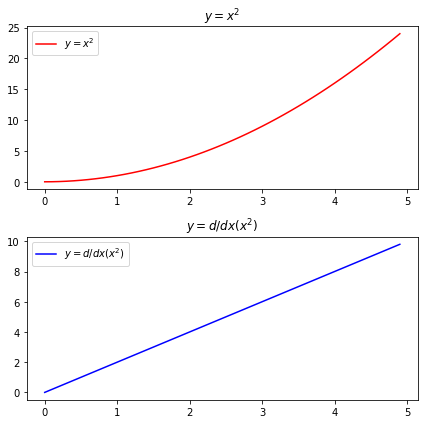

In [4]:
#Testing the differentiation.

#Draw the parabolic curve
f = lambda x: x * x
X = [x / 10 for x in range(50)]   #X = [0, 0.1, 0.2, ..., 4.95]
Y = [f(x) for x in X]
chart = graph.figure(figsize = (6, 6))
g1, g2 = chart.subplots(2, 1)
g1.plot(X, Y, 'red', label = "$y = x ^ 2$")
g1.set_title("$y = x ^ 2$")
g1.legend()

#Compute and plot the derivative
Y = [df_dx(f, x) for x in X]
g2.plot(X, Y, 'blue', label = "$y = d/dx(x ^ 2)$")
g2.set_title("$y = d/dx(x ^ 2)$")
g2.legend()
graph.tight_layout()

The graph of the derivative of the squaring function appears to have a linear characteristic and passes through the origin. Let us derive the equation of this line in slope-intercept form ($y = mx + c$).  

In [5]:
#Find the equation of the derivative
f = lambda x: x * x
print(f"y1 = f'(0) = {df_dx(f, 0)}\ny2 = f'(2) = {df_dx(f, 2)}")
print(f"y = (y2 - y1)/(x2 - x1)x + c = ({df_dx(f, 2)} - {df_dx(f, 0)} / 2 - 0)x + {df_dx(f, 0)}")
print(f"y = {(df_dx(f, 2) - df_dx(f, 0)) / 2}x + {df_dx(f, 0)}")
print(f"y = {round(((df_dx(f, 2) - df_dx(f, 0)) / 2), 3)}x + {round(df_dx(f, 0), 3)}\t[Rounded-off to 3 decimal places.]")

y1 = f'(0) = 1e-05
y2 = f'(2) = 4.000010000027032
y = (y2 - y1)/(x2 - x1)x + c = (4.000010000027032 - 1e-05 / 2 - 0)x + 1e-05
y = 2.0000000000135163x + 1e-05
y = 2.0x + 0.0	[Rounded-off to 3 decimal places.]


Considering that we have approximated the value of $h$ to $0.00001$, it is expected that a small error must have been introduced into our calculations. However, the calculations appear to be sufficiently accurate up to 3-4 decimal places.  

The equation of the derivative comes out as $y = 2x$.  
This completely agrees with our previous result: $f'(x) = 2x$.  

Thus, we can conclude that our method of calculating derivatives is approximately correct.  


**Take-away**: *It is critical to visualize this method as a tool for obtaining the slope of the curve of a given function, at a specific point*.

### The Power  
Let us now turn towards the exponential/power function:  
$exp(a, x) = a ^ x$.  

At this point, we can only calculate simple integral powers of $a$. Fractional powers cannot be calculated with our current understanding. Nevertheless, we shall use the generic exponentiation operator of Python for simplicity.  

We shall now plot a couple of graphs for different values of $a$.  

In [6]:
#Define the power function
def exp(a, x):
  return(a ** x)

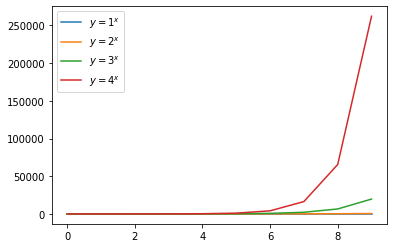

In [7]:
#Test the power function
for a in [1, 2, 3, 4]:
  Y = [exp(a, x) for x in range(10)]  #X = [0, 1, ..., 10]
  graph.plot(Y, label = f"$y = {a} ^ x$")
graph.legend()
print()   #Clears the extra graph info.

Our inability to process fractional powers results in a discontinuous and segmented exponential curve because two consecutive points are far apart. This does not help us in graphically analysing the exponential function.  

We need to find a workaround to plot points closer to each other. This can be achieved by connecting consecutive points using curves rather than straight lines. These curves are called B-Splines.  

We shall **plot a B-Spline of 3rd order so as to smoothen our exponential curve**. This can be visualized as connecting two consecutive points with a continuous curve in order to make it useful for analysis. We need not delve into the depths of B-Splines because this visualization gives a clear intuition of what is going on.  

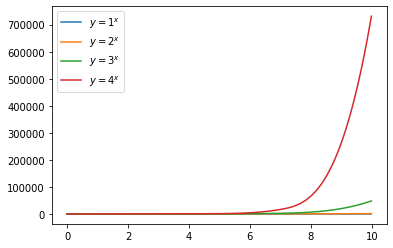

In [8]:
#Plot the chart
for a in [1, 2, 3, 4]:
  X = [x for x in range(10)]  #X = [0, 1, 2, ..., 9]
  Y = [exp(a, x) for x in X]

  #Set up the B-Spline function
  f = make_interp_spline(X, Y, k = 3)
  X = [x / 100 for x in range(1000)]    #X = [0.00, 0.01, 0.02, ..., 9.99]
  graph.plot(X, f(X), label = f"$y = {a} ^ x$")
graph.legend()
print()   #Clears the extra graph info.

The graph reveals that the **function $f(x) = a ^ x$ is monotonously increasing** (for $a > 1$) and it appears that the **slope of this curve is also continuously increasing**. Let us verify this observation.  

We shall now obtain the derivative of the exponential function by First Principle. For this, we need to **wrap the exponential function ($exp(a, x)$) into a single-parameter method** so that it can be fed to the derivative function ($df\_dx(f, x)$).  

In [9]:
#Define the decorative wrapper
def exp_wrapper(a):
  def exp_a(x):
    return(exp(a, x))
  return(exp_a)

**Note**: _In order to numerically obtain the Derivative by First Principle, we shall be exploiting the computer's capability of processing fractional powers. However, **the underlying intuition is that we are merely obtaining the slope of the curve from its graph**. Concretely, we are finding the slope of the tangent at a specific point on a curve and it should be seen as a graphical analysis of the smooth curve which we have previously obtained._  

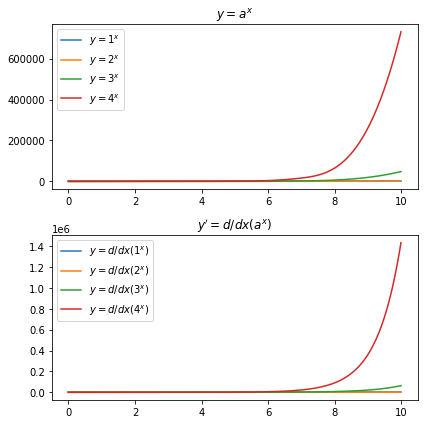

In [10]:
#Set up the chart parameters
chart = graph.figure(figsize = (6, 6))
g1, g2 = chart.subplots(2, 1)

#Plot the charts
for a in [1, 2, 3, 4]:
  X = [x for x in range(10)]  #X = [0, 1, 2, ..., 9]
  Y = [exp(a, x) for x in X]

  #Set up the 3rd-order B-Spline
  f = make_interp_spline(X, Y, k = 3)
  X = [x / 100 for x in range(1000)]    #X = [0.00, 0.01, ..., 9.99]
  g1.plot(X, f(X), label = f"$y = {a} ^ x$")

  #Set up a single-parameter exponential function for calculating its derivative.
  f = exp_wrapper(a)
  g2.plot(X, [df_dx(f, x) for x in X], label = f"$y = d/dx({a} ^ x)$")

#Format the chart
g1.set_title("$y = a ^ x$")
g1.legend()
g2.set_title("$y' = d/dx(a ^ x)$")
g2.legend()
graph.tight_layout()

Our inference that the graph has an increasing slope holds true. It can also be seen that the **derivatives of the curves have a similar character to the curves themselves**, except that their values (Y-axis) appear to have been scaled.  

**Let's find out the scaling factors of the derivatives** of each of these curves and plot them.  

				d/dx(a ^ x) / (a ^ x)

a\x	0	1	2	3	4	5	6	7	8	9
1	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
2	0.693	0.693	0.693	0.693	0.693	0.693	0.693	0.693	0.693	0.693
3	1.099	1.099	1.099	1.099	1.099	1.099	1.099	1.099	1.099	1.099
4	1.386	1.386	1.386	1.386	1.386	1.386	1.386	1.386	1.386	1.386


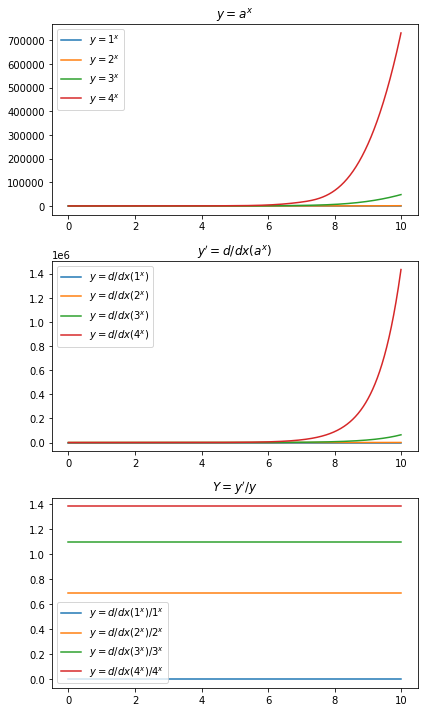

In [11]:
#Set up the chart and table parameters
chart = graph.figure(figsize = (6, 10))
print("\t\t\t\td/dx(a ^ x) / (a ^ x)\n\na\\x\t", end = "")
print(*[x for x in range(10)], sep = "\t")
g1, g2, g3 = chart.subplots(3, 1)

#Plot the charts
for a in [1, 2, 3, 4]:
  X = [x for x in range(10)]
  Y = [exp(a, x) for x in X]

  #Set up the 3rd-order B-Spline
  f = make_interp_spline(X, Y, k = 3)
  X = [x / 100 for x in range(1000)]    #X = [0.00, 0.01, ..., 9.99]
  g1.plot(X, f(X), label = f"$y = {a} ^ x$")

  #Set up a single-parameter exponential function for calculating its derivative.
  f = exp_wrapper(a)
  g2.plot(X, [df_dx(f, x) for x in X], label = f"$y = d/dx({a} ^ x)$")

  #Tabulate the results
  print(a, *[round(df_dx(f, x) / f(x), 3) for x in range(10)], sep = "\t")
  g3.plot(X, [df_dx(f, x) / f(x) for x in X], label = f"$y = d/dx({a} ^ x) / {a} ^ x$")

#Format the chart
g1.set_title("$y = a ^ x$")
g1.legend()
g2.set_title("$y' = d/dx(a ^ x)$")
g2.legend()
g3.set_title("$Y = y' / y$")
g3.legend()
graph.tight_layout()

As we had expected, **the exponential function and its derivative are directly proportional to each other**. The derivative curve is simply a scaled version of the original exponential curve.  

**Take-away**: _For a given derivative curve, the scaling factor, as compared to the original exponential curve, remains constant and independent of the $X$-axis. However, it varies as the base of the exponential curve ($a$) changes._

### The Curious Coefficient

Let us formally define this scaling factor which we have come across during our analysis of the derivative of the exponential function:  
* Its value does not depend upon the *index* of the exponent.  
* Its value depends upon the *base* of the exponent and it remains constant over different indices.  
* Thus, **the scaling factor is a coefficient whose value is a function of the base of an exponent**. Let us denote this coefficient as $g(a)$.  
* This coefficient, when multiplied with a specific power of its corresponding base, yields the derivative of the exponential function at that point.  
* Concretely, 
$\frac{d}{dx}a ^ x = a ^ x g(a)$  

Conversely, $g(a) = \frac{1}{a ^x}\frac{d}{dx}a ^ x$  

Let us encode the following definition of our coefficient $g$ and use it to study the coefficients for different bases:  
$g(a) = \frac{1}{a ^ x}\frac{d}{dx}a ^ x$  

As the coefficient is independent of the index, we shall calculate all the dervitives at a common and convenient index of $0$.  
If $x = 0$, $a ^ x = 1$  
$\implies g(a) = \frac{d}{dx}a ^ x|_{x = 0}$  


Therefore, **the coefficient $g$ is the derivative of the exponential function $(y = a ^ x)$ at $x = 0$.**  

We can use the derivative-by-First-Principle \[*df_dx()*\] method defined earlier to calculate this derivative.  
**Note**: The function $g(a)$ should be visualized as a method which finds the slope of the exponential curve $y = a ^ x$ at $x = 0$.

In [12]:
#Define the function for the curious coefficient
def g(a):
  '''Coefficient of the exponential function with base "a"'''
  exp_a = exp_wrapper(a)
  return(df_dx(exp_a, 0))     #The derivative is calculated at the convenient index of 0: a ^ 0 = 1.

In [13]:
#Tabulate the coefficients for different bases.
print("a", *range(1, 10), sep = "\t")
print("g(a)", *[round(g(a), 4) for a in range(1, 10)], sep = "\t")

a	1	2	3	4	5	6	7	8	9
g(a)	0.0	0.6931	1.0986	1.3863	1.6095	1.7918	1.9459	2.0795	2.1972


These coefficients appear to be consistently increasing.  
What else can we make out from this pattern?  
We need to be more imaginative in order find trends in this series. The first non-zero coefficient of this series is $0.6931$.  
**Let's compare the entire series with this term.**

In [14]:
#Tabulate the observations
print("a\t", *range(2, 11), sep = "\t")
print("g(a)\t", *[round(g(a), 4) for a in range(2, 11)], sep = "\t")
print("g(a) - g(2)", *[round(g(a) - g(2), 4) for a in range(2, 11)], sep = "\t")

a		2	3	4	5	6	7	8	9	10
g(a)		0.6931	1.0986	1.3863	1.6095	1.7918	1.9459	2.0795	2.1972	2.3026
g(a) - g(2)	0.0	0.4055	0.6932	0.9163	1.0986	1.2528	1.3863	1.5041	1.6095


Some results from the above comparison:  
* $g(4)-g(2) \approx g(2)$  
* $g(6)-g(2) \approx g(3)$  
* $g(8)-g(2) \approx g(4)$  
* $g(10)-g(2) \approx g(5)$  

We use the '$\approx$' symbol because the numbers are fractional and may be prone to error.  

Alternatively, we can rewrite these results as:
* $g(2)+g(2) \approx g(4)$  
* $g(2)+g(3) \approx g(6)$  
* $g(2)+g(4) \approx g(8)$  
* $g(2)+g(5) \approx g(10)$  

Which brings us to the following logical hypothesis:  
$g(a)+g(b)=g(a \times b)$  

**Let us test this hypothesis for different values.**

In [15]:
#Tabulate the results of the hypothesis
print("g(a) + g(b)\t\tg(a * b)")
for a in [3, 4, 5]:
  for b in [2, 3, 4, 5]:
    print(f"g({a}) + g({b}) = {round(g(a) + g(b), 4)}\tg({a * b}) = {round(g(a*b), 4)}")
  print()

g(a) + g(b)		g(a * b)
g(3) + g(2) = 1.7918	g(6) = 1.7918
g(3) + g(3) = 2.1972	g(9) = 2.1972
g(3) + g(4) = 2.4849	g(12) = 2.4849
g(3) + g(5) = 2.7081	g(15) = 2.7081

g(4) + g(2) = 2.0795	g(8) = 2.0795
g(4) + g(3) = 2.4849	g(12) = 2.4849
g(4) + g(4) = 2.7726	g(16) = 2.7726
g(4) + g(5) = 2.9958	g(20) = 2.9958

g(5) + g(2) = 2.3026	g(10) = 2.3026
g(5) + g(3) = 2.7081	g(15) = 2.7081
g(5) + g(4) = 2.9958	g(20) = 2.9958
g(5) + g(5) = 3.2189	g(25) = 3.2189



**Our hypothesis: $g(a \times b) = g(a) + g(b)$ stands vindicated!**  

Let's take this a bit further...  
From the above result, if $b = a$, then:  
$g(a \times a) = g(a^2) = g(a) + g(a)$  
$\implies g(a^2) = 2g(a)$.  

Similarly,  
$g(a^n) = g(a \times a \times a \times \ldots (n$ times$)) = g(a) + g(a) + \ldots (n$ times$)$  
$\implies g(a^n) = ng(a)$.  

**Let us now verify this corollary numerically.**


In [16]:
#Tabulate the observations
print("\t\t\tg(a ^ n) / g(a)")
print("a\\n", *[n for n in range(10)], sep = "\t")
for a in range(2, 6):
  ga = g(a)
  print(a, *[round(g(a ** n)/g(a), 3) for n in range(10)], sep = "\t")

			g(a ^ n) / g(a)
a\n	0	1	2	3	4	5	6	7	8	9
2	0.0	1.0	2.0	3.0	4.0	5.0	6.0	7.0	8.0	9.0
3	0.0	1.0	2.0	3.0	4.0	5.0	6.0	7.0	8.0	9.0
4	0.0	1.0	2.0	3.0	4.0	5.0	6.0	7.0	8.0	9.0
5	0.0	1.0	2.0	3.0	4.0	5.0	6.0	7.0	8.0	9.001


Wow, the results indicate a very promising correlation.  
We can conclude that **our corollary is indeed correct**.  

**Take-away**: _Let us now summarise the properties of the coefficient $g$ which we have discovered so far:_  
For a function $f$ such that $f(x) = a^x$, where $a > 1$:  
1. $f'(x) = f(x)g(a)$  
2. Thus, $g$ is independent of $x$ and depends only upon $a$.  
3. $g(a) = f'(0)$
4. $g(a \times b) = g(a) + g(b)$  
5. $g(a ^ n) = ng(a)$


### Double-check!  
This is a good time to pause, recollect and reflect on our results.  
If you believe that you are sufficiently convinced with our results, then please feel free to skip to the next section _(Digging Deeper)_.  

Let's now **cross-verify these results analytically**.  

For $f(x) = a ^ x$, by the First Principle:  
$f'(x) = \lim\limits_{h \to 0} \frac{f(x + h) - f(x)}{h}$  
$\therefore  f'(x) = \lim\limits_{h \to 0} \frac{a ^ {x + h} - a ^ x}{h} = \lim\limits_{h \to 0} \frac{a ^ x . a ^ h - a ^ x}{h}$   
$\therefore  f'(x) = a ^ x \lim\limits_{h \to 0} \frac{a ^ h - 1}{h}$   

**Result**: As expected, $f'(x) \propto a ^ x $.  
Thus, $f'(x) = f(x)g(a)$ has been proven analytically, where the coefficient of proportionality, $g$, is given by:  
$g(a) = \lim\limits_{h \to 0} \frac{a ^ h - 1}{h}$. \[1\]  

**Result**: Thus, $g$ is independent of $x$ and depends only upon $a$. \[2\]  

Also, $f'(x) = a ^ x g(a)$,  
$\therefore f'(0) = a ^ 0 g(a) = g(a)$  
**Result**: Thus, $g(a) = f'(0)$ \[3\]  

We have $f(x) = a ^ x$.  
Let $a = m \times n$.  
$\therefore f(x) = a ^ x = (mn) ^ x$  
$\implies f'(x) = \frac{d}{dx}(mn) ^ x = \frac{d}{dx}(m ^ x n ^ x)$  
$\implies f'(x) = n ^ x \frac{d}{dx}(m ^ x) + m ^ x \frac{d}{dx}(n ^ x)$ ... By Chain rule.  
By definition, $\frac{d}{dx}(a ^ x) = a ^ x g(a)$,  
$\therefore f'(x) = n ^ x (m ^ x g(m)) + m ^ x (n ^ x g(n))$  
$\therefore f'(x) = (m ^ x n ^ x) (g(m) + g(n)) = (mn) ^ x (g(m) + g(n))$  
But $m \times n = a$.  
$\implies f'(x) = a ^ x (g(m) + g(n))$  
$\implies a ^ x g(a) = a ^ x (g(m) + g(n))$  
$\implies g(a) = g(m) + g(n)$  
$\implies g(m \times n) = g(m) + g(n)$  
**Result** \[4\]  

We have $g(a) = \lim\limits_{h \to 0} \frac{a ^ h - 1}{h}$.  
Let $a = b ^ n$.  
$\implies g(a) = g(b ^ n) = \lim\limits_{h \to 0} \frac{(b ^ n) ^ h - 1}{h} = \lim\limits_{h \to 0} \frac{b ^ {nh} - 1}{h}$.  
Let $nh = t$. As $h \to 0, t \to 0$.  
$\therefore h = \frac{t}{n}$  
$\implies g(b ^ n) = \lim\limits_{t \to 0} \frac{b ^ t - 1}{\frac{t}{n}}$  
$\implies g(b ^ n) = n\lim\limits_{t \to 0} \frac{b ^ t - 1}{t}$  
$\implies g(b ^ n) = n  g(b)$  
**Result** \[5\]

Wonderful!  
**We have successfully proven all the results about the coefficient $g$**, which we had obtained during our analysis of the exponential function.

### Digging Deeper...  
We still have no clue about the purpose of this coefficient. We just know that:
* $g(1) = 0$.  
* $g(a \times b) = g(a) + g(b)$  
* $g(a ^ n) = ng(a)$

**Let us figure out that value of $c$, such that $g(c) = 1$**.  
This shall help simplify our understanding of the coefficient $g$.  
We can guess that such a $c$ should lie between $2$ and $3$ because $g(2) = 0.6931$ and $g(3) = 1.0986$.  
**Let us use binary search to find $c$.**

In [17]:
#Define the generic binary search function
def binary_search(left, right, fn, target = 1):
  '''Searches for the occurrence of c between left & right, such that fn(c) = target.'''
  c = None
  #Random initialization, far from target
  fn_mid = target * 3 + 1
  
  #Halt at a value of fn(c) which, up to 6 decimal places, is equal to the target.
  while ((fn_mid < target - 0.000001) or (fn_mid > target + 0.000001)):
    mid = (left + right) / 2
    fn_mid = fn(mid)

    if(fn_mid < target):
      left = mid
    elif(fn_mid > target):
      right = mid
    else:
      print(f"Eureka!\nfn({mid}) = {target}!")        #Highly unikely to happen.
    c = mid
  
  return(c)

In [18]:
#Perform the binary search for c, such that g(c) = 1.
c = binary_search(left = 2, right = 3, fn = g)
print(f"Binary Search has converged.\nc = {c}\ng(c) = {g(c)}")

Binary Search has converged.
c = 2.7182693481445312
g(c) = 1.000000408701851


**Take-away**: _We have discovered $c = 2.7183$, such that $g(c) = 1$._  
This is a very interesting result...  

We know that: $g(a ^ n) = ng(a)$.  

Similarly,  
$g(c ^ n) = ng(c) = n$ $...$ because $g(c) = 1$

Thus, $g(a) = n$, such that $a = c ^ n$.  

Let us digest our new finding...  

**Major results:**
* In simple words, **the coefficient function $g(a)$ can be expressed as the power of the constant $c$ which yields $a$**.  
* To simplify further, **the coefficient $g$ of $a$ is that value which when raised to the power of the constant $c$ gives $a$.**  
* $g(a) = n  \colon c ^ n = a$, where $c = 2.7183$.  

**Let us verify this numerically.**

In [19]:
#Tabulate the powers of c and their corresponding coefficients (g)
print("n\t", *range(1, 10), sep = "\t")
print("c ^ n\t", *[round(c ** n, 2) for n in range(1, 10)], sep = "\t")
print("g(c ^ n)", *[round(g(c ** n), 2) for n in range(1, 10)], sep = "\t")

n		1	2	3	4	5	6	7	8	9
c ^ n		2.72	7.39	20.09	54.6	148.41	403.42	1096.6	2980.85	8102.75
g(c ^ n)	1.0	2.0	3.0	4.0	5.0	6.0	7.0	8.0	9.0


**Our conjecture holds true for natural powers of $c$.**  
Hypothetically, $c ^ {g(a)} = a$.  

Thus, as $g(2) = 0.6931$,  
$\implies 2.7183 ^ {0.6931} = 2$.  

This is a bit difficult for us to comprehend because we cannot make sense of fractional powers. Ideally, the results should hold true for fractional powers, but we do not know how to process them.  

Most importantly, for $c = 2.7183$,  
$g(c) = 1$, which means that:  
$\frac{d}{dx} c ^ x = c ^ x$  

**The slope of this exponential curve  at any point is same as the value of the curve itself!**  

**Major take-aways**:  
* For $c = 2.7183$, $g(c) = 1$.
* $\frac{d}{dx} c ^ x = c ^ x$.



### **Eureka!**  
We have stumbled upon, identified and studied some very interesting mathematical phenomena!  

**Let us summarise these results:**  

The constant $c$ which we discovered is the fabled ***Euler's Number***!  
It is denoted by '$e$'. **We shall also henceforth refer to it as $e$.**  
* $\frac{d}{dx} e ^ x = e ^ x$
* $e \approx 2.7183$

The coefficient $g$ which we discovered is known as the ***natural logarithm***.  
For logarithms having base $a$, we use the notation $log_a$. A logarithm can be definied as:  
$log_a(x) = n \colon a ^ n = x$.  
For any logarithm:  
* $\log(a \times b) = \log(a) + \log(b)$  
* $\log(a ^ n) = n \log(a)$

**_Natural Logarithms_ are denoted by "$ln$". We shall also refer to $g$ as $ln$ henceforth.**  
* $\frac{d}{dx} a ^ x = a ^ x\ln(a)$
* $e$ is the base of natural logarithms, i.e., $\ln(e) = 1$.
* Essentially, $\ln(a) = n \colon e ^ n = a$.  
* $\ln(a) = \lim\limits_{h \to 0} \frac{a ^ h - 1}{h}$.  
  

Let's **redefine our coefficientsfunction** $g(a)$ as $\ln(a)$.  
We shall also declare the constant $e$ and **define the function** exp_e$(x) = e^x$.   

In [20]:
#Declare the constant 'e' and load it from the previous result 'c'.
e = c

#Redefine the log function
ln = g

#Define the exponential function for 'e'.
exp_e = exp_wrapper(e)

**Note**: We may be unable to process fractional indices but we can certainly make sense of fractional bases, i.e., $1.23 ^ n = 1.23 \times 1.23 \times 1.23 \times \ldots$ ($n$ times).  
Therefore, as $a$ is a base of the exponential function in $g(a)$, we can definitely compute and plot the values of $g(a)$ for fractional values of $a$ as well.  

**Let's plot $\ln(x)$ v/s $x$, as well as $e ^ x$ v/s $x$ to gain more insights into their properties**.  

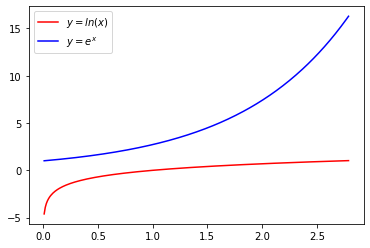

In [21]:
X = [x / 100 for x in range(1, 280)]

#Plot the logarithmic curve
Y = [ln(a) for a in X]
graph.plot(X, Y, 'red', label = "$y = ln(x)$")

#Plot the exponential curve
Y = [exp_e(a) for a in X]
graph.plot(X, Y, 'blue', label = "$y = e^x$")

graph.legend()
print()   #Clears the extra graph info.

### The Logarithm

The curve of $\ln(x)$ appears to be continuously increasing. However, in contrast to the curve of $e^x$, the slope of the curve of $\ln(x)$ appears to be continuously _decreasing_.  

It seems that the slope starts very high at $x = 0$ and gradually tends to $0$ as $x$ increases.

**Let's study the slope of $\ln(x)$ by computing its derivative.**  

				d/dx(ln(x)))
x		1	2	3	4	5	6	7	8	9
ln(x)		0.0	0.69	1.1	1.39	1.61	1.79	1.95	2.08	2.2
d/dx(ln(x))	1.0	0.5	0.33	0.25	0.2	0.17	0.14	0.13	0.11



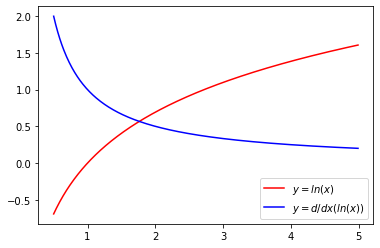

In [22]:
#Tabulate the logarithms
print("\t\t\t\td/dx(ln(x)))")
print("x\t", *range(1, 10), sep = "\t")
print("ln(x)\t", *[round(ln(x), 2) for x in range(1, 10)], sep = "\t")
print("d/dx(ln(x))", *[round(df_dx(ln, x), 2) for x in range(1, 10)], sep = "\t")

#Plot the charts
X = [x / 100 for x in range(50, 500)]   #X = [0.00, 0.01, ..., 4.99]

#Plot the logarithms
Y = [ln(x) for x in X]
graph.plot(X, Y, 'red', label = "$y = ln(x)$")

#Plot the derivatives
Y = [df_dx(ln, x) for x in X]
graph.plot(X, Y, 'blue', label = "$y = d/dx(ln(x))$")
graph.legend()
print()   #Clears the extra graph info.

The table clearly indicates an inverse proportionality between the function $\ln(x)$ and its derivative:  
$\frac{d}{dx}\ln(x) \propto \frac{1}{x}$  

**Let us verify this proportionality and find out the constant $k$**, such that:  
$x\frac{d}{dx}\ln(x) = k$.

In [23]:
#Tabulate the result
print("\t\t\t\tx d/dx(ln(x)))")
print("x\t", *range(1, 10), sep = "\t")
print("ln(x)\t", *[round(ln(x), 2) for x in range(1, 10)], sep = "\t")
print("d/dx(ln(x))", *[round(df_dx(ln, x), 2) for x in range(1, 10)], sep = "\t")
print("x d/dx(ln(x))", *[round(x * df_dx(ln, x), 2) for x in range(1, 10)], sep = "\t")

				x d/dx(ln(x)))
x		1	2	3	4	5	6	7	8	9
ln(x)		0.0	0.69	1.1	1.39	1.61	1.79	1.95	2.08	2.2
d/dx(ln(x))	1.0	0.5	0.33	0.25	0.2	0.17	0.14	0.13	0.11
x d/dx(ln(x))	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0


**Result**: we have established that $k = 1$.  
$\therefore \frac{d}{dx}\ln(x) = \frac{1}{x}$  

Interestingly, we also find that the curves of $\ln(x)$ and its derivative, i.e., $\frac{1}{x}$ intersect each other somewhere between $x = 1.5$ and $x = 2$.  

Let this be point $c$, such that:  
$\ln(c) = \frac{1}{c}$  
$\therefore c\ln(c) = 1$  
$\therefore \ln(c^c) = 1$  
$\implies c^c = e$  

**Let us locate $c$ using _Binary Search_.**

In [24]:
#Perform the binary search for c, such that cln(c) = 1.
c = binary_search(left = 1.5, right = 2, fn = lambda x: x * ln(x))
print(f"Binary Search has converged.\nc = {c}\ncln(c) = {c * ln(c)}")

Binary Search has converged.
c = 1.7632207870483398
cln(c) = 0.9999996272941354


**Result**: thus, we have $c = 1.76322$, such that:  
$c^c = e$.  

However, establishing this result analytically is a matter of complex and advanced mathematics, and is, therefore, beyond the scope of this article.  

Such equations are called as _transcendental equations_ and they do not have an ordinary algebraic solution. Those who wish to know more may look-up the [Lambert $W$ function](https://en.wikipedia.org/wiki/Lambert_W_function) which is used to solve such equations.  

It should suffice to say that the solution which we have obtained graphically (i.e., $c = 1.76322$) is just one of the roots of the equation $x\ln(x) = c$

**Take-aways**:  
* $\frac{d}{dx}\ln(x) = \frac{1}{x}$  
* For $c = 1.76322, c^c = e$  


### _To infinity and beyond..._

Even at this point, $1.76322^{1.76322}$ does not make any sense to us because **we do not comprehend fractional powers yet**.  
As a result, we cannot even process $e^x$ for fractional values of $x$.  
**Let's try to change that.** For this, we need a revolutionary, out-of-the-box approach!  

Let $P$ be an arbitrary polynomial in $x$, such that:  
$P(x) = c_0 + c_1x + c_2x^2 + c_3x^3 + \ldots$  
Where $c_0$, $c_1$, $c_2$, $c_3$, $\ldots$ are constants.  
And let $e^x=P(x)$.  
$\implies e^x = c_0 + c_1x + c_2x^2 + c_3x^3 + \ldots$  


We may have trouble understanding fractions in the index, but we can certainly handle them in polynomials. Thus, $e^{2.5}$ may be difficult for us to comprehend, but we can easily process $P(2.5) = c_0 + 2.5c_1 + 2.5^2c_2 + 2.5^3c_3 + \ldots$

At this point, we do not know the order of the polynomial $P$. We also do not know the values of any of the constants.  

But we know that, $e^0 = 1$.  
$\implies e^0 = c_0 + 0c_1 + 0c_2 + 0c_3 + \ldots$  
$\implies e^0 = c_0 = 1$  
**Results**:  
* $c_0 = 1$  
* In $P(x)$, $t_n(x) = c_nx^n$  
* $P(x) = \sum\limits_{n=0}^{\infty} c_nx^n$  

Again, we have:  
$P(x) = e^x$  
Differentiating both the sides...  
$\therefore \frac{d}{dx}P(x) = \frac{d}{dx} e^x$  
But $\frac{d}{dx} e^x = e^x$, as we have previously discovered.  
$\therefore P'(x) = e^x$  
$\therefore \frac{d}{dx}(c_0 + c_1x + c_2x^2 + c_3x^3 + \ldots) = e^x$  
$\therefore 0 + c_1 + 2c_2x + 3c_3x^2 + 4c_4x^3 + \ldots = e^x$  
$\therefore c_1 + 2c_2x + 3c_3x^2 + 4c_4x^3 + \ldots = e^x$  
For $x = 0$,  
$\therefore c_1 + 2c_2(0) + 3c_3(0) + 4c_4(0) + \ldots = e^0$  
$\implies c_1 + 0 + 0 + \ldots = e^0 = 1$  
**Results**:  
* $c_1 = 1$  
* In $P'(x)$, $t_n(x) = nc_nx^{n-1}$  
* $P'(x) = \sum\limits_{n=0}^{\infty} nc_nx^{n-1}$  

Further,  
$\frac{d^2}{dx^2}P(x) = \frac{d^2}{dx^2}e^x = \frac{d}{dx}\left(\frac{d}{dx}e^x\right)$  
But as $\frac{d}{dx} e^x = e^x$,  
$\therefore P''(x) = e^x$  
$\therefore \frac{d}{dx}(0 + c_1 + 2c_2x + 3c_3x^2 + 4c_4x^3\ldots) = e^x$       ...\[From previous result of $P'(x)$.\] 
$\therefore 0 + 0 + 2c_2 + 3.2.c_3x + 4.3.c_4x^2 + 5.4.c_5x^3 + \ldots = e^x$  
$\therefore 2c_2 + 6c_3x + 12c_4x^2 + 20c_5x^3 + \ldots = e^x$  
For $x = 0$,  
$\therefore 2c_2 + 6c_3(0) + 12c_4(0)\ldots = e^0$  
$\implies 2c_2 + 0 + 0 + \ldots = e^0 = 1$  
**Results**:  
* $c_2 = \frac{1}{2}$  
* In $P''(x)$, $t_n(x) = n(n-1)c_nx^{n-2}$  
* $P''(x) = \sum\limits_{n=0}^{\infty} n(n-1)c_nx^{n-2}$  

Even further,  
$P'''(x) = \frac{d^3}{dx^3}e^x = e^x$  
$\therefore \frac{d}{dx}(0 + 0 + 2c_2 + 3.2.c_3x + 4.3.c_4x^2 + 5.4.x^3 + \ldots) = e^x$       ...\[From previous result of $P''(x)$.\]  
$\therefore 0 + 0 + 0 + 3.2.c_3 + 4.3.2.c_4x + 5.4.3.c_5x^2 + 6.5.4.c_6x^3 + \ldots = e^x$  
$\therefore 6c_3 + 24c_4x + 60c_5x^2 + 120c_6x^3\ldots = e^x$  
For $x = 0$,  
$\therefore 6c_3 + 24c_4(0) + 60c_5(0) + 120c_6(0)\ldots = e^0$  
$\implies 6c_3 + 0 + 0 + \ldots = e^0 = 1$  
**Results**:  
* $c_3 = \frac{1}{6}$  
* In $P'''(x)$, $t_n(x) = n(n-1)(n-2)c_nx^{n-3}$  
* $P'''(x) = \sum\limits_{n=0}^{\infty} n(n-1)(n-2)c_nx^{n-3}$  

Interestingly, a general pattern seems to be emerging...  

For $\frac{d^m}{dx^m}P(x)$, with $m > 1$, $ n > 0 $ and both $m, n$ are integers:  
$t_n(x) = n(n - 1)(n - 2)\ldots(n - m + 1)c_nx^{n-m}
$  

$\therefore \frac{d^m}{dx^m}P(x) = \sum\limits_{n=0}^{\infty}t_n(x) = \sum\limits_{n=0}^{\infty} n(n - 1)(n - 2)\ldots(n- m - 1)c_nx^{n-m}$  

And we know that $\frac{d^m}{dx^m}P(x)|_{x = 0} = e^0 = 1$.  
$\implies \sum\limits_{n=0}^{\infty}t_n(0) = 1$.  

Further analyzing the general term $t_n$, we see that:  
* For $(n < m)$, one element in the product of $n(n - 1)\ldots(n - m + 1)$ must be $0$.  
$\therefore t_{n < m}(x) = 0$  
* For $(n > m)$, the order of the variable $x$ in $x^{n - m}$ must be greater than $1$. Thus, all such terms have $x$ as a multiplier and for $x = 0$, all such terms must also be $0$.  
$\therefore t_{n > m}(0) = 0$  
* For $(n = m)$, the order of the variable $x$ in $x^{n - m}$ must be $0$. Thus, this is the only term of the infinite series without $x$ as a multiplier.  
$\therefore t_{n = m}(0) = n(n - 1)(n - 2)\ldots(n - m + 1)c_nx^{n-m}$  
Equating $m$ with $n\ldots$  
$\therefore t_{n = m}(0) = m(m - 1)(m - 2)\ldots(1)c_mx^{m-m}$  
$\therefore t_{n = m}(0) = m(m - 1)(m - 2)\ldots(3)(2)(1)c_mx^0$  
 **Result**: $t_{n = m}(0) = m!c_m$  

**Let's bring together all of our results...**  
We have: $\sum\limits_{n=0}^{\infty}t_n(0) = 1$.  

We shall break down the general terms into three categories.  
$\therefore\sum\limits_{n=0}^{\infty}t_n(0) = \sum\limits_{n=0}^{m-1}t_n(0) + t_{n = m}(0) + \sum\limits_{n=m+1}^{\infty}t_n(0) = 1$.  

From our previous results, we know that:  
* $t_{n < m}(x) = 0$
* $t_{n > m}(0) = 0$
* $t_{n = m}(0) = m!c_m$

$\therefore\sum\limits_{n=0}^{\infty}t_n(0) = 0 + t_{n = m}(0) + 0 = 1$.  
$\implies m!c_m = 1$  
**Take-away**: $c_m = \frac{1}{m!}$  

Brilliant! Now we have a **formula to compute the coefficients of the polynomial $P$.**  

**Let's first define the factorial function** which we would need and then we shall **find out some of these coefficients**.  

In [25]:
#Define the factorial function.
def factorial(x):
  if(x == 0):
    return(1)
  else:
    return(x * factorial(x - 1))

#Tabulate the coefficients
print("m\tm!\tc_m = 1/m!")
for m in range(10):
  m_fact = factorial(m)
  print(m, m_fact, round(1 / m_fact, 8), sep = "\t")

m	m!	c_m = 1/m!
0	1	1.0
1	1	1.0
2	2	0.5
3	6	0.16666667
4	24	0.04166667
5	120	0.00833333
6	720	0.00138889
7	5040	0.00019841
8	40320	2.48e-05
9	362880	2.76e-06


The result of our code matches very well with the first four coefficients which we have previosuly obtained.  
It is also noteworthy that the coefficients decrease drastically and quickly become infinitesimally small.  

Thus we have the polynomial $P$:  
$P(x) = \sum\limits_{n=0}^{\infty} c_nx^n = e^x$  
$\therefore e^x = c_0 + c_1x + c_2x^2 + c_3x^3 + c_4x^4 + \ldots$  
**Take-away**: $e^x = 1 + x + \frac{x^2}{2!} + \frac{x^3}{3!} + \frac{x^4}{4!} + \ldots$  

Great! We have magically pulled out a polynomial from our hat which resembles the function $f(x) = e^x$, but **does it really work!?**  

**Let's find out!**  
For this, we shall have to **re-define our _exp\_e(x)_ function**. **We shall limit our computation to the point where the terms of the series become infinitesimally small** ($< 10^{-9}$). **We shall also require an _absolute-value function_** to judge whether a term is sufficiently small.  

After that, we shall verify if the derived polynomial (_exp\_e(x)_ function) emulates the function $e^x$ or not by comparing it with the actuall powers of $e$.  


In [26]:
#Define the absolute value function
abs = lambda x: x if x >= 0 else -x

#Re-define the exp_e(x) function
def exp_e(x):
  t = 1
  sum = 0
  n = 1
  while(abs(t) > 0.000000001):   #Repeat the steps until the new term becomes infinitesimally small.
    sum += t    #Add the the term t_n to the sum.
    t *= x/n    #Generate the next term t_n = (x^n) / n!
    n += 1
  return(sum)

In [27]:
#Tabulate the result
print("\t\t\t\te^x v\s exp_e(x)")
print("x\t\t", *range(8), sep = "\t")
print("e^x\t\t", *[round(e ** x, 3) for x in range(8)], sep = "\t")
print("exp_e(x)\t", *[round(exp_e(x), 3) for x in range(8)], sep = "\t")
print("|e^x - exp_e(X)|", *[round(abs((e ** x) - exp_e(x)), 4) for x in range(8)], sep = "\t")
print("Error\t\t", *[str(round(abs(((e ** x) - exp_e(x)) * 100 / (e ** x)), 4)) + str("%") for x in range(8)], sep = "\t")

				e^x v\s exp_e(x)
x			0	1	2	3	4	5	6	7
e^x			1.0	2.718	7.389	20.085	54.597	148.41	403.418	1096.598
exp_e(x)		1	2.718	7.389	20.086	54.598	148.413	403.429	1096.633
|e^x - exp_e(X)|	0.0	0.0	0.0001	0.0003	0.001	0.0034	0.0111	0.0352
Error			0.0%	0.0005%	0.0009%	0.0014%	0.0018%	0.0023%	0.0028%	0.0032%


**Eureka, indeed!**  
The polynomial matches the powers of $e$ within a considerably small error margin, although, it should be noted that **the relative error appears to increase with increasing power**.  

### Say hello to Taylor Series...  

The process of determining the coefficients of the polynomial $P$ – which emulates the behaviour of the function $e^x$, provides an **excellent intuition into the workings of the Taylor series approximation**.  

The polynomial $P$ is what we call a **Taylor polynomial** which **converges onto the actual value** of the underlying function **as the order of this polynomial approaches infinity**.  

In general, the _**Taylor series**_ for an _infinitely differentiable function $f$_ is given as:
* $f(x + h) = f(x) + hf'(x) + \frac{h^2}{2!}f''(x) + \frac{h^3}{3!}f'''(x) + \ldots$  
Where the power series given by: $\sum\limits_{n=0}^{\infty} \left(\frac{h^n}{n!}\right)\frac{d^n}{dx^n}f(x)$  
converges upon the value of $f(x+h)$ as $n \to \infty$


Our approach at deriving the polynomial for $e^x$, is similar to having implemented the **Taylor series expansion at $x = 0$**. Such a series is known as the _**Maclaurin Series**_.  

The **Maclaurin series** for an _infinitely differentiable function $f$_ is given as:
$f(h) = f(0) + hf'(0) + \frac{h^2}{2!}f''(0) + \frac{h^3}{3!}f'''(0) + \ldots$  

### Note on _"errors"_:   

The reason why we must tolerate some errors in our results \(such as the one above\) or halt a programme once it reaches within a certain region around the target value \(such as during the binary searches which we have performed\) has much to do with computational accuracy, but more than that, these **errors are a consequence of the inherent properties of the very numbers we are dealing with!**  

The constant $e$ and its factors and multiples are what we call as _irrational numbers_. Which means that, unlike the _rational numbers_, **_irrational numbers_ cannot be expressed as the sum, difference, product or division of _integers_**. Thus, no matter how hard we try, no combination of sum, difference, product and ratio (also known as a closed-form expression) of a finite number of rational numbers can ever yield an irrational number.  

The reason why our polynomial representation of $e^x$ theoretically works is  because it is a summation of an infinite series, and therefore, a non-closed-form expression. The result will tend towards its actual value as the number of elements of the series approach infinity, which is impractical.  

Moreover, in our computers, **numbers are inherently stored in the memory as sums and differences of discrete powers of 2**. Thus, **it is practically impossible to store an actual irrational number in computer memory** because it cannot be expressed as a sum, difference, product or ratio of powers of 2. Thus, the best we can hope for is an approximation of an irrational number which is as precise and close to the actual value as practically possible.  

**Take-away**: This is how mathematics teaches us that _"to err is human (and also machine)"_.

### Fractional Powers – Bring 'em on!  

Now that we can compute $e^x$ for fractional values of $x$, we can essentially calculate any fractional index!  

**Let us define our own power function** to do so:  
$power(a, x) = e^{x\ln(a)} = a^x$  

In [28]:
#Define the power function
def power(a, x):
  '''Calculates the power for integral and non-integral indices'''
  return(exp_e(x * ln(a)))

**Note**: We declare a new $power(a, x)$ function instead of redefining the existing $exp(a,x)$ function because the new power function requires the $\ln(x)$ function, which in turn requires the original $exp(a, x)$ function to find the logarithm, which is the derivative of the exponentian $a^x$ at $x = 0$. Thus, _re-defining the $exp(a, x)$ function would lead to an infinite loop and no outcome!_  

A few sections ago, we discovered the value of $c$ such that $c^c = e$.  
**Let's test this result.**  

In [29]:
#Test the result for c
print(f"c^c = {c}^{c} = {power(c, c)}")
print(f"Relative Error = {round((power(c, c) - e) * 100 / e, 4)}%")

c^c = 1.7632207870483398^1.7632207870483398 = 2.718280815166778
Relative Error = 0.0004%


Excellent!  
Our power function arrives at a very precise answer.  
**Fractional powers are no longer beyond our reach!**  

Using this function, **let's now see if $e^{\ln(2)}$ indeed equals $2$**.  
Let's verify this for different values, and not just 2.

In [30]:
#Tabulate the result
print("\t\t\t\te^ln(x) and ln(e^x)")
print("x", *range(1, 10), sep = "\t")
print("e^ln(x)", *[round(exp_e(ln(x)), 3) for x in range(1, 10)], sep = "\t")
print("ln(e^x)", *[round(ln(exp_e(x)), 4) for x in range(1, 10)], sep = "\t")

				e^ln(x) and ln(e^x)
x	1	2	3	4	5	6	7	8	9
e^ln(x)	1	2.0	3.0	4.0	5.0	6.0	7.0	8.0	9.0
ln(e^x)	1.0	2.0	3.0	4.0001	5.0001	6.0002	7.0002	8.0003	9.0004


As we can see, $e^{\ln(x)} = \ln(e^x) = x$.  
**Take-away**: Thus, we can conclude that **$e^x$ and $\ln(x)$ are inverse functions of one-another**.

### Can this get any more _Complex_ than this?  

Great idea!  
**What if we raise $e$ to an imaginary power?**  

We know that:  
$e^x = 1 + x + \frac{x^2}{2!} + \frac{x^3}{3!} + \ldots$  
$\therefore e^{ix} = 1 + ix + \frac{(ix)^2}{2!} + \frac{(ix)^3}{3!} + \ldots$  
$\therefore e^{ix} = 1 + ix + \frac{i^2x^2}{2!} + \frac{i^3x^3}{3!} + \frac{i^4x^4}{4!} + \frac{i^5x^5}{5!} + \ldots$  
$\therefore e^{ix} = 1 + ix + \frac{(-1)x^2}{2!} + \frac{(-i)x^3}{3!} + \frac{(1)x^4}{4!} + \frac{(i)x^5}{5!} + \ldots$  
$\therefore e^{ix} = 1 + ix - \frac{x^2}{2!} - i\frac{x^3}{3!} + \frac{x^4}{4!} + i\frac{x^5}{5!} + \ldots$  
$\therefore e^{ix} = \left(1 - \frac{x^2}{2!} + \frac{x^4}{4!} -\frac{x^6}{6!} + \ldots\right) + i\left(x - \frac{x^3}{3!} + \frac{x^5}{5!} - \frac{x^7}{7!} + \ldots\right)$  

**Take-aways**: $e^{ix}$ is a complex number \($a + ib$\) such that:  
* $a = Re(e^{ix}) = 1 - \frac{x^2}{2!} + \frac{x^4}{4!} -\frac{x^6}{6!} + \ldots$ \[Even powers of $x$ with alternating signs\]
* $b = Im(e^{ix}) = x - \frac{x^3}{3!} + \frac{x^5}{5!} - \frac{x^7}{7!} + \ldots$ \[Odd powers of $x$ with alternating signs\]

Thus, we get the general form for $e^{ix} = a + ib$ where:  
* $a = \sum\limits_{n = 0}^{\infty}\frac{(-1)^n x^{2n}}{(2n)!} $
* $b = \sum\limits_{n = 0}^{\infty}\frac{(-1)^n x^{2n+1}}{(2n+1)!} $

Hence, for $e^{-ix}$, we get:  
$a = 1 - \frac{(-x)^2}{2!} + \frac{(-x)^4}{4!} -\frac{(-x)^6}{6!} + \ldots$  
$\therefore a = 1 - \frac{x^2}{2!} + \frac{x^4}{4!} -\frac{x^6}{6!} + \ldots$  
$\implies Re(e^{-ix}) = Re(e^{ix})$  

And
$b = (-x) - \frac{(-x)^3}{3!} + \frac{(-x)^5}{5!} - \frac{(-x)^7}{7!} + \ldots$  
$\therefore b = -x + \frac{x^3}{3!} - \frac{x^5}{5!} + \frac{x^7}{7!} - \ldots$  
$\therefore b = - \left(x - \frac{x^3}{3!} + \frac{x^5}{5!} - \frac{x^7}{7!} + \ldots \right)$  
$\implies Im(e^{-ix}) = Im(e^{ix})$  

**Result**: if $e^{ix} = a + ib$,  
then $e^{-ix} = a - ib$  
**Take-away**: Thus, **$e^{ix}$ and $e^{-ix}$ are complex conjugates** of one another.

Every complex number \($a + ib$\) can be represented in a polar form \($r, T$\) such that:  
* $r = \sqrt{a^2 + b^2}$
* $T = \tan^{-1}\left(\frac{b}{a}\right)$
* $T$ is the angle that the vector $\vec{r}$ makes with the Real axis, in the complex plane.

And  
* $a = r\cos(T)$
* $b = r\sin(T)$

So let's find $r$...  
$r = \sqrt{a^2 + b^2} = \sqrt{(a + ib) (a - ib)}$  
$\implies r^2 = (a + ib) (a - ib)$  

$\therefore$ for $e^{ix} = a + ib$,  
$r^2 = (a + ib) (a - ib)$  
$\therefore r^2 = (e^{ix}) (e^{-ix}) = e^0 = 1$  

As $r$ is supposed to be a geometric length,  
**Take-aways**:  
* $r = 1$
* $\therefore \|(e^{ix})\| = 1$
* Thus, **every complex number of the form $e^{ix}$ is a unit vector in the Complex Plane**


### Are we going in _Circles_?  

For the complex number $e^{ix}$, We know that:  
* $a = r\cos(T)$
* $b = r\sin(T)$

But $r = 1$, thus:  
* $a = \cos(T)$  
$\implies Re(e^{ix}) = \sum\limits_{n = 0}^{\infty}\frac{(-1)^n x^{2n}}{(2n)!}  = \cos(T)$  
__Result__: $\cos(T) = \sum\limits_{n = 0}^{\infty}\frac{(-1)^n x^{2n}}{(2n)!} = 1 - \frac{x^2}{2!} + \frac{x^4}{4!} -\frac{x^6}{6!} + \ldots$  
* $b = \sin(T)$  
$\implies Im(e^{ix}) = \sum\limits_{n = 0}^{\infty}\frac{(-1)^n x^{2n+1}}{(2n+1)!} = \sin(T)$  
__Result__: $ \sin(T) = \sum\limits_{n = 0}^{\infty}\frac{(-1)^n x^{2n+1}}{(2n+1)!} = x - \frac{x^3}{3!} + \frac{x^5}{5!} - \frac{x^7}{7!} + \ldots$  

But what's the relationship between $x$ and $T$?  
**Let's find out by defining and comparing the newly discovered functions.**  

In [31]:
#Define the infinite sum approximation for the real-part of e^ix
def Re_exp_i(x):
  t = 1
  sum = 0
  n = 2
  while(abs(t) > 0.000000001):   #Repeat the steps until the new term becomes infinitesimally small.
    sum += t    #Add the the term t_n to the sum.
    t *= -1 * (x * x) / (n * (n - 1))    #Generate the next term t_n = (-1^n)(x^2n) / (2n)!
    n += 2
  return(sum)

#Define the infinite sum approximation for the imaginary-part of e^ix
def Im_exp_i(x):
  t = x
  sum = 0
  n = 3
  while(abs(t) > 0.000000001):   #Repeat the steps until the new term becomes infinitesimally small.
    sum += t    #Add the the term t_n to the sum.
    t *= -1 * (x * x) / (n * (n - 1))    #Generate the next term t_n = (-1^n)(x^(2n+1)) / (2n+1)!
    n += 2
  return(sum)

In [32]:
#Tabuate the comparison
X = [(math.pi * 0.25 * n) for n in range(13)]
print("\t\t\t\te^(ix) v/s Trigonometric Ratios")
print("x\t", *[str(0.25 * n) + "π" for n in range(13)], sep = "\t")
print("Re_exp(ix)", *[round(Re_exp_i(x), 4) for x in X], sep = "\t")
print("cos(x)\t", *[round(math.cos(x), 4) for x in X], sep = "\t")
print("\nIm_exp(ix)", *[round(Im_exp_i(x), 4) for x in X], sep = "\t")
print("cos(x)\t", *[round(math.sin(x), 4) for x in X], sep = "\t")

				e^(ix) v/s Trigonometric Ratios
x		0.0π	0.25π	0.5π	0.75π	1.0π	1.25π	1.5π	1.75π	2.0π	2.25π	2.5π	2.75π	3.0π
Re_exp(ix)	1	0.7071	-0.0	-0.7071	-1.0	-0.7071	0.0	0.7071	1.0	0.7071	-0.0	-0.7071	-1.0
cos(x)		1.0	0.7071	0.0	-0.7071	-1.0	-0.7071	-0.0	0.7071	1.0	0.7071	0.0	-0.7071	-1.0

Im_exp(ix)	0	0.7071	1.0	0.7071	-0.0	-0.7071	-1.0	-0.7071	0.0	0.7071	1.0	0.7071	-0.0
cos(x)		0.0	0.7071	1.0	0.7071	0.0	-0.7071	-1.0	-0.7071	-0.0	0.7071	1.0	0.7071	0.0


The match is spot-on!  
**The corresponding functions are equivalent.**  
Thus, $x = T$  
**Result**: This means that the Complex Number $e^{ix}$ makes an angle of $x^c$ with the Real axis.  

**Take-aways**:  
* $Re(e^{ix}) = \cos(x)$  
* $Im(e^{ix}) = \sin(x)$  
* $\therefore e^{ix} = \cos(x) + i\sin(x)$  

As a result, we get:  
$e^{ix} = \cos(x) + i\sin(x)$  
Thus, the function $e^{ix}$ is a **Circular Function** with a period of $2\pi$.  

**The remarkable equation $e^{ix} = \cos(x) + i\sin(x)$ is known as _Euler's Formula_**.  
And the expression $\cos(x) + i\sin(x)$ is called as the **$\text{cis}$ notation**.  
$\text{cis}(x) = e^{ix} = \cos(x) + i\sin(x)$

Additionally, the **results**:  
* $\cos(x) = 1 - \frac{x^2}{2!} + \frac{x^4}{4!} - \frac{x^6}{6!} + \ldots$  
And
* $\sin(x) = x - \frac{x^3}{3!} + \frac{x^5}{5!} - \frac{x^7}{7!} + \ldots$  

Are what we call as the **Maclaurin Series** expansions of the _cosine_ and the _sine_ functions respectively.  

The _Maclaurin Series_, as we have discussed previously, is the _Taylor series_ of a given function at $x = 0$.  

The **infinite power series have thus proven to be very handy in calculations** which we otherwise find difficult or sometimes outright incomprehensible.  



### _Beauty and the $e$..._  

In the verification table of $e^{ix}$ v/s $\cos(x)$ & $\sin(x)$, we came across a remarkable observation:  
* $\text{cis}(\pi) = e^{i\pi}  = \cos(\pi) + i\sin(\pi) \\
= -1 + i(0) \\
= -1$

**Result**:  $e^{i\pi} + 1 = 0$

Folks, we have stumbled upon the legendary **Euler's Identity**!  

To quote [Wikipedia](https://en.wikipedia.org/wiki/Euler%27s_identity), _Euler's identity_ or _Euler's equation "is considered to be an **exemplar of mathematical beauty** as it shows a profound connection between the most fundamental numbers in mathematics"_.  

The identity combines five seemingly unrelated fundamental constants ($i, 0, 1, e, \pi$) – each used exactly once, into one wonderful equation using three basic algebraic operations (addition, multiplication and exponentiation) – each of which are also used exactly once.  


### _Breaking boundaries_...  
Let's ponder upon our latest reuslt for a moment...  
* $e^{i\pi} = -1$  
And, as an implication:  
* $\ln(-1) = i\pi$  

These two results are absolutely ground-breaking for us!  
Let us digest them...  

We began our thought experiment with the analysis of the exponential function $exp(a, x) = a^x$. However, until now, we had restricted its domain to the positive integral powers of positive numbers, specifically for $a > 1$ and $x = [0, 1, 2, \ldots]$.  

With everything that we have discovered so far, I believe that **we are ready to break the boundaries separataing us from fractional indices and negative bases!**    

Let us **visually summarize** what this implies, starting with the **powers of the humble $e$**...  
But before we do that, **let's define the notations** which we would use to render the graphs. This includes the $\text{cis}, \cos$ and $\sin$ functions.  


In [33]:
#Assign the real and imaginary parts of e^(ix) as cos(x) and sin(x) functions respectively
cos = Re_exp_i
sin = Im_exp_i

#Define the cis notation which returns a tuple (cos(x), sin(x))
def cis(x):
  return(cos(x), sin(x))

In [34]:
#Test the cis notation
print("\tcis(x)")
print("x\tcos(x)\tsin(x)")
for n in range(5):
  x = math.pi * 0.25 * n
  cis_x = cis(x)
  print(str(0.25 * n) + "π", round(cis_x[0], 4), round(cis_x[1], 4), sep="\t")

	cis(x)
x	cos(x)	sin(x)
0.0π	1	0
0.25π	0.7071	0.7071
0.5π	-0.0	1.0
0.75π	-0.7071	0.7071
1.0π	-1.0	-0.0


Now that we have our notations set up, armed with all our discoveries, **let's see how $e^{ix}$ looks like**.  

**Note**:  
* $X$-axis is horizontal and **increases towards the right**.  
* $Y$-axis is vertical and **increases upwards**.  
* $Z$-axis is the **imaginary axis**. It goes into the plane and **increases inwards**.  
* In order to do this, **we re-arrange the plotting parameters as $(X, Z, Y)$**.


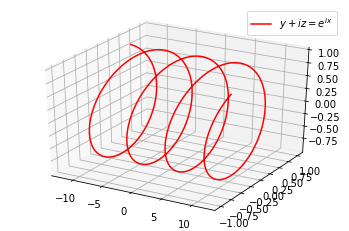

In [35]:
#Plot the chart
chart = graph.figure()
axes = chart.gca(projection='3d')
X = [x / 100 for x in range(-1200, 1200)]   #X = [-12.00, -11.99, ..., 11.98, 11.99]

#Plot e^(ix)
Y = []
Z = []
for x in X:
  cis_x = cis(x)
  Y.append(cis_x[0])    #Real part
  Z.append(cis_x[1])    #Imaginary part
axes.plot(X, Z, Y, 'red', label = "$y + iz = e^{ix}$")

graph.legend()
print()   #Clears the extra graph info.

**It looks like a beautiful solenoid!**  

What if we **separately plot the real and imaginary parts of this curve?**  

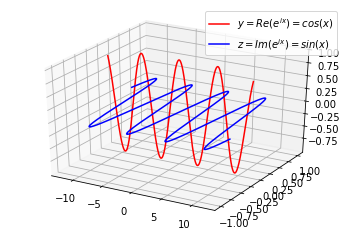

In [36]:
#Plot the chart
chart = graph.figure()
axes = chart.gca(projection='3d')
X = [x / 100 for x in range(-1200, 1200)]   #X = [-12.00, -11.99, ..., 11.98, 11.99]
zeroes = [0 for x in X]
Y = []
Z = []
for x in X:
  cis_x = cis(x)
  Y.append(cis_x[0])    #Real part
  Z.append(cis_x[1])    #Imaginary part

#Plot Re_e^(ix)
axes.plot(X, zeroes, Y, 'red', label = "$y = Re(e^{ix}) = cos(x)$")
#Plot Im_e^(ix)
axes.plot(X, Z, zeroes, 'blue', label = "$z = Im(e^{ix}) = sin(x)$")

graph.legend()
print()   #Clears the extra graph info.

Brilliant!  
**What we are looking at is exactly how Electormagnetic waves _\(light\)_ propagate!**  

The _Electrical field_ \($\vec{E}$\) and the _Magnetic field_ \($\vec{B}$\) propagate as perpendicular sinusoidal waves, shifted by a phase difference of $\frac{\pi}{2}^c$.  

The only difference being that $\vec{E}$ has a far higher magnitude as compared to $\vec{B}$.  
$\frac{\|\vec{E}\| }{\|\vec{B}\|} = c \approx 3 \times 10^8$  

**The complex powers of $e$ have given us a deep intuition into the working of light waves!**  

**Let's now plot $e^x$ v/s $e^{ix}$.**  

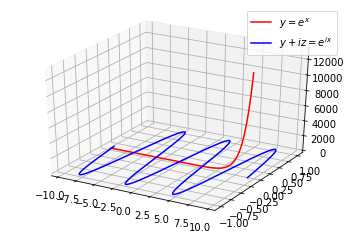

In [37]:
#Plot the chart
chart = graph.figure()
axes = chart.gca(projection='3d')
X = [x / 100 for x in range(-950, 950)]   #X = [-9.50, -9.49, ..., 9.48, 9.49]

#Plot e^x
Y = [exp_e(x) for x in X]
Z = [0 for _ in X]
axes.plot(X, Z, Y, 'red', label = "$y = e^x$")

#Plot e^(ix)
Y = []
Z = []
for x in X:
  cis_x = cis(x)
  Y.append(cis_x[0])    #Real part
  Z.append(cis_x[1])    #Imaginary part
axes.plot(X, Z, Y, 'blue', label = "$y + iz = e^{ix}$")

graph.legend()
print()   #Clears the extra graph info.

The blue curve of $e^{ix}$ appears like a sinusoid from this view.  
But that is because the $Y$-axis gets crunched due to the exponentially increasing values of $e^x$.  


Let's now move on to negative bases...  

Consider $a$, such that $a < 0$:  
$\therefore a = (-1)|a|$  
**Result**: $a = (e^{i\pi})|a|$  

Thus, we can now represent any negative number as a product of its absolute value and $e^{i\pi}$.

Hence for $a < 0$, we get the following **results**:  
* $a^x = (e^{i\pi}|a|)^x = e^{i\pi x}|a|^x$  
$\implies a^x = |a|^x\text{cis}(\pi x)$  
* $\ln(a) = \ln(e^{i\pi}|a|) = \ln(e^{i\pi}) + \ln(|a|)$  
$\implies \ln(a) = \ln(|a|) + i\pi$  

**Take-aways**:
* $a^x = \begin{cases} |a|^x\text{cis}(\pi x) & \text{if } a < 0 \\
a^x & \text{if } a > 0\end{cases}$  
* $\ln(a) = \begin{cases} \ln(|a|) + i\pi & \text{if } a < 0 \\
\ln(a) & \text{if } a > 0\end{cases}$  

Armed with this knowledge, **let's now plot $\ln(x)$ in all the quadrants.**  


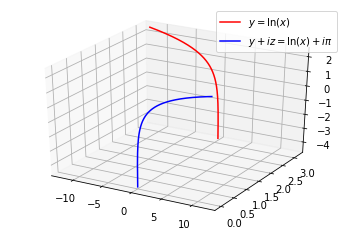

In [38]:
#Plot the chart
chart = graph.figure()
axes = chart.gca(projection='3d')

X = [x / 100 for x in range(-1200, 1200)]   #X = [-12.00, -11.99, ..., 11.98, 11.99]
X.remove(0)   #Remove x = 0 because we cannot plot negative infinity

X_negative = []
Y_negative = []
Z_negative = []

X_positive = []
Y_positive = []
Z_positive = []

#Populate the points
for x in X:
  if (x < 0):
    X_negative.append(x)
    Y_negative.append(ln(abs(x)))  #Real part
    Z_negative.append(math.pi)     #Imaginary part
  else:
    X_positive.append(x)
    Y_positive.append(ln(x))  #Real part
    Z_positive.append(0)      #Imaginary part

#Plot ln(x)
axes.plot(X_negative, Z_negative, Y_negative, 'red', label = "$y = \ln(x)$")
axes.plot(X_positive, Z_positive, Y_positive, 'blue', label = "$y + iz = \ln(x) + i\pi$")

graph.legend()
print()   #Clears the extra graph info.

It is evident from this graph that the _Real Numbers_ and the _Complex Numbers_ are separated by an endless, infinite chasm, but they are unified by the **_logarithm_**!  

**Let's now see if we can plot the exponents of a negative number**, say $a = -3$.  

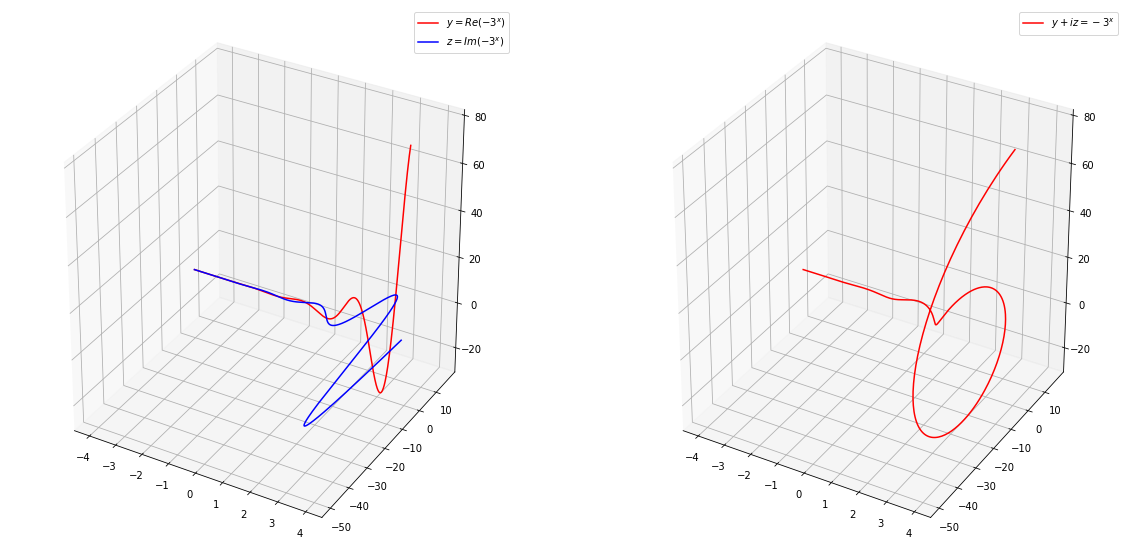

In [39]:
#Set the base as a negative number
a = -3

#Plot the charts
chart = graph.figure(figsize=(20, 10))
X = [x / 100 for x in range(-400, 400)]   #X = [-4.00, -3.99, ..., 3.98, 3.99]
zeroes = [0 for x in X]
Y = []
Z = []

#Populate the points
for x in X:
  cis_pi_x = cis(math.pi * x)
  Y.append(cis_pi_x[0] * power(abs(a), x))    #Real part
  Z.append(cis_pi_x[1] * power(abs(a), x))    #Imaginary part

#Separately plot real and imaginary components of a^x
g1 = chart.add_subplot(1, 2, 1, projection='3d')
g1.plot(X, zeroes, Y, 'red', label = f"$y = Re({a}^x)$")
g1.plot(X, Z, zeroes, 'blue', label = f"$z = Im({a}^x)$")
g1.legend()

#Plot a^x
g2 = chart.add_subplot(1, 2, 2, projection='3d')
g2.plot(X, Z, Y, 'red', label = f"$y + iz= {a}^x$")

graph.legend()
print()   #Clears the extra graph info.

### The Golden Spiral
At first, these charts may not look much, but what are looking at is **a spiral**, similar to the one for $e^{ix}$, excepth that it has been **_amplified_ by a factor of $|a|^x$** and its **frequency hastened by a factor of $\pi$.**  

**Let's have a better look at this spiral from a different angle**, i.e., the $YZ$-plane.  

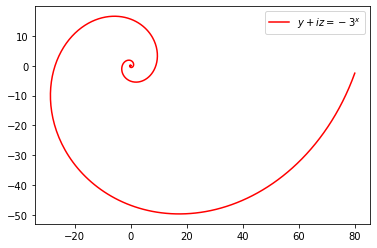

In [40]:
#Set the base
a = -3
#Plot the Y-Z plane
X = [x / 100 for x in range(-400, 400)]   #X = [-4.00, -3.99, ..., 3.98, 3.99]
zeroes = [0 for x in X]
Y = []
Z = []

#Populate the points
for x in X:
  cis_pi_x = cis(math.pi * x)
  Y.append(cis_pi_x[0] * power(abs(a), x))    #Real part
  Z.append(cis_pi_x[1] * power(abs(a), x))    #Imaginary part
graph.plot(Y, Z, 'red', label = f"$y + iz= {a}^x$")
graph.legend()
print()   #Clears the extra graph info.

On plotting the $YZ$-plane, **the curve manifests itself into a beautiful logarithmic spiral**, the special case of which is **the golden spiral**.  

The golden ratio \($\phi$\), its value and **the golden spiral is beyond the scope of this article**. However, now that we have reached here, **let's briefly delve into plotting one**.  

A golden spiral is one in which the radius increases by a factor of $\phi$ for every quarter revolution of the curve. Which means, for a point on the curve in the polar form $(r, \theta)$:  
$r_{\theta = \frac{\pi}{2}} = \phi r_{\theta = 0}$

In our case, $a^x = |a|^x\text{cis}(\pi x)$ for $a < 0$.  
As a **result**:  
* $r = |a|^x$  
* $\theta = \pi x$  

Thus, the equation $r_{\theta = \frac{\pi}{2}} = \phi r_{\theta = 0}$ becomes:  
$r_{\pi x = \frac{\pi}{2}} = \phi r_{\pi x = 0}$  
$\therefore r_{x = \frac{1}{2}} = \phi r_{x = 0}$  
$\therefore |a|^x_{x = \frac{1}{2}} = \phi |a|^x_{x = 0}$  
$\therefore |a|^{\frac{1}{2}} = \phi |a|^0$  
$\therefore  \sqrt{|a|} = \phi$  
**Result**: $|a| = \phi^2$  
$\implies  a = -\phi^2$  

**Let us use the off-the-shelf value of the golden ratio**:  
$\phi = \frac{1+\sqrt{5}}{2}$  
Thus, $a = -\frac{(1 + \sqrt5)^2}{4} = -\frac{1 + 2\sqrt5 + 5}{4}$  
**Result**: $a = -\frac{6 + 2\sqrt5}{4}$  

**Let us plot the logarithmic curve for this value of $a$.**  

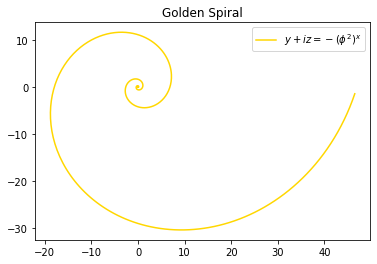

In [41]:
#Set the base
a = -(6 + (2 * power(5, 0.5))) / 4
#Plot the Y-Z plane
X = [x / 100 for x in range(-400, 400)]   #X = [-4.00, -3.99, ..., 3.98, 3.99]
zeroes = [0 for x in X]
Y = []
Z = []

#Populate the points
for x in X:
  cis_pi_x = cis(math.pi * x)
  Y.append(cis_pi_x[0] * power(abs(a), x))    #Real part
  Z.append(cis_pi_x[1] * power(abs(a), x))    #Imaginary part
graph.plot(Y, Z, 'gold', label = f"$y + iz= -(\phi^2)^x$")
graph.title("Golden Spiral")
graph.legend()
print()   #Clears the extra graph info.

**Behold, The golden spiral!**  

Thus, **we have stumbled upon a very intimate relationship between** the fundamental constants \($i, \phi, e, \pi $ etc..) and the _**Pingala sequence**_, later known as the **Fibonacci sequence**.  

### _More power to negative numbers..._  

**Negative numbers \($|a| < 1$\), thus generate beautiful spirals** extending outwards when we plot their powers. It can, thus,  be expected that **if $|a| < 1$, then the amplification can be turned into dampening**.  

**Let us test this hypothesis...**  


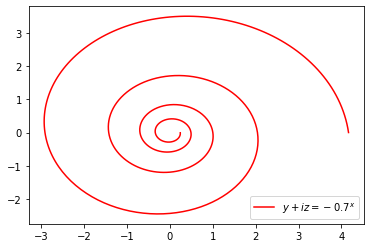

In [42]:
#Set the base (|a| < 1)
a = -0.7
#Plot the Y-Z plane
X = [x / 100 for x in range(-400, 400)]   #X = [-4.00, -3.99, ..., 3.98, 3.99]
zeroes = [0 for x in X]
Y = []
Z = []

#Populate the points
for x in X:
  cis_pi_x = cis(math.pi * x)
  Y.append(cis_pi_x[0] * power(abs(a), x))    #Real part
  Z.append(cis_pi_x[1] * power(abs(a), x))    #Imaginary part
graph.plot(Y, Z, 'red', label = f"$y + iz= {a}^x$")
graph.legend()
print()   #Clears the extra graph info.

**The hypothesis holds good!**  
We get a similar spiral as the previous one, except that this one grows inwards...  

**Let's now plot the graphs of $a^x$ v/s $(-a)^x$**, as a mark of having conquered the limitation of processing fractional powers and negative bases.  

**We shall plot $5^x$ v/s $-5^x$ as well as $0.5^x$ v/s $-0.5^x$.**  
**Let's also plot $5^x$ v/s $Re(-5^x)$**  


In [43]:
#Define the function to plot the exponents of a given base and its additive inverse
def plot_exp_a_and_minus_a(a, chart):
  a = abs(a)    #Retain the positive value of a
  X = [x / 100 for x in range(-400, 400)]   #X = [-4.00, -3.99, ..., 3.98, 3.99]
  zeroes = [0 for x in X]
  
  #Populate the points for positive base
  Y = [power(a, x) for x in X]
  Z = zeroes
  #Plot the chart for positive base
  chart.plot(X, Z, Y, 'red', label = f"$y = {a}^x$")
  
  powers_a = Y
  Y = []
  Z = []
  #Populate the points for negative base
  for x, pow_a_x in zip(X, powers_a):
    cis_pi_x = cis(math.pi * x)
    Y.append(cis_pi_x[0] * pow_a_x)    #Real part
    Z.append(cis_pi_x[1] * pow_a_x)    #Imaginary part
  #Plot the chart for negative base
  chart.plot(X, Z, Y, 'blue', label = f"$y + iz = -{a}^x$")
  chart.legend()

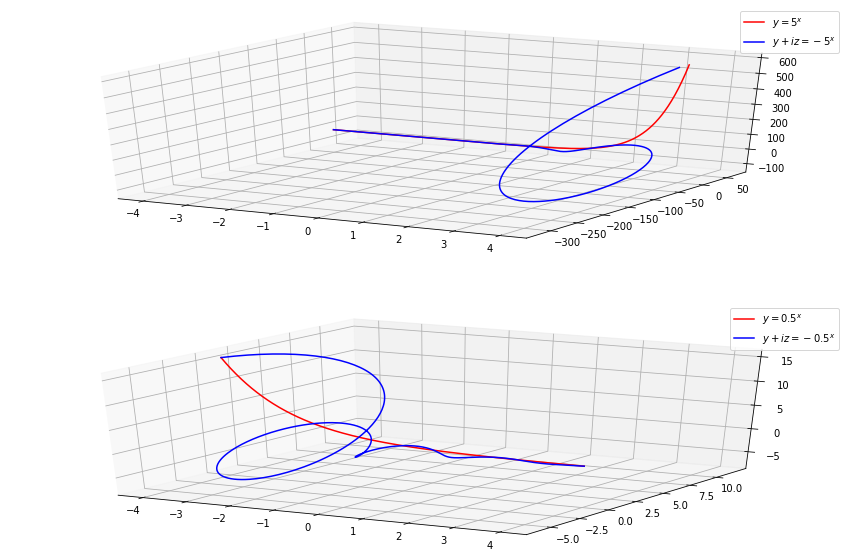

In [44]:
#Set the bases
a = [5, 0.5]

#Plot the charts
chart = graph.figure(figsize=(15, 10))
g1 = chart.add_subplot(2, 1, 1, projection='3d')

#Plot the first chart
plot_exp_a_and_minus_a(a[0], g1)

#Plot the second chart
g2 = chart.add_subplot(2, 1, 2, projection='3d')
plot_exp_a_and_minus_a(a[1], g2)

print()   #Clears the extra graph info.

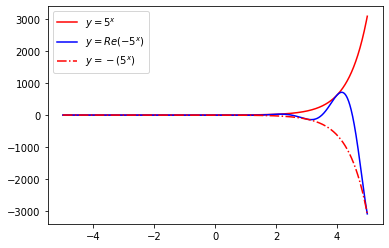

In [45]:
#Set the base
a = -5

#Retain the positive value of a
a = abs(a)

#Plot the chart
X = [x / 100 for x in range(-500, 500)]   #X = [-5.00, -4.99, ..., 4.98, 4.99]
#Populate the points for positive base
Y = [power(a, x) for x in X]
graph.plot(X, Y, 'red', label = f"$y = {a}^x$")

powers_a = Y
Y = []
#Populate the points for negative base
for x, pow_a_x in zip(X, powers_a):
  Y.append(Re_exp_i(math.pi * x) * pow_a_x)    #Real part
graph.plot(X, Y, 'blue', label = f"$y = Re(-{a}^x)$")

#Mirror the exponential curve along the X-axis
Y = [-y for y in powers_a]
graph.plot(X, Y, 'r-.', label = f"$y = -({a}^x)$")
graph.legend()
print()   #Clears the extra graph info.

We see that, while the function **$a^x$ follows a straightforward exponential curve**, **$(-a)^x$ oscillates with an amplified/dampened amplitude**.  

The **curve of $(-a)^x$ is bounded by the values $|a|^x$ and $-|a|^x$** in the real plane, and it **intersects these values at even and odd integral values of $x$**, respectively.  

Moreover, **at non-integral multiples of $x = \frac{1}{2}$**, the curve of $(-a)^x$ intersects $y = 0$, and **its value is completely imaginary**. This is because:  
$(-a)^{\frac{2n+1}{2}} = (-1)^{\frac{2n+1}{2}}(a)^{\frac{2n+1}{2}}$ where $n = [\ldots, -2, -1, 0, 1, 2, \ldots]$  
Thus, $(-a)^{\frac{2n+1}{2}} = \pm i a^{\frac{2n+1}{2}}$  
Which is purely imaginary.  

### $Farewell\ldots$

Through the course of this article, we have explored and re-discovered centuries of mathematical developments in a matter of minutes – all thanks to the immense computational power available at our disposal today.  

As I see it, **if $i$ is the foundation of the _Complex Numbers_ then $e$ is the bridge that connects them with the _Real Numbers_**. If you have made it this far, I sincerely hope that you have enjoyed our journey to **_find and understand $e$_**, as much as I have enjoyed putting it together...  

I hope that, as a take-away of this thought experiment, you **experience a nuanced sense of awe and appreciation for the beauty, symmetry, inter-connectedness and order possessed by numbers**, and how **$e$ brings them all together.**  


नमस्ते!  
Namaste!  
🙏